In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import math
import time
import datetime as dt
import datetime

%matplotlib inline

# US Flights of 1987 - 2008

### This dataset reports flights in the United States, including date , Cancelled , Diverted, originating airport and airports distribution delays, and  for delays,from 1987 to 2008.  This is a large dataset: there are nearly 120 million  However, processing the report is time consuming due to the size of Dataset Therefore, the important parts were analyzed from our point of view and we asked these questions so that we can answer them after analyzing the dataset on them
- What is the distribution of flights during daily and months
- What is the percentage of canceled and diverted flights compared to completed flights?
- What is the distribution of flights for all time periods and in each month
- What is the highest, average, and lowest number of flights and More delay for each period of time in every month
- What is the top 10 destination cities per month?
- What are the top 10 cities in which flight was delayed either originating airport and airports distribution
- What is the day, month, and most and least number of flights per period of time

In [2]:
df=pd.read_csv('1987.csv')

In [3]:
df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,1987,10,14,3,741.0,730,912.0,849,PS,1451,...,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,1987,10,15,4,729.0,730,903.0,849,PS,1451,...,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,1987,10,17,6,741.0,730,918.0,849,PS,1451,...,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,1987,10,18,7,729.0,730,847.0,849,PS,1451,...,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,1987,10,19,1,749.0,730,922.0,849,PS,1451,...,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1311826 entries, 0 to 1311825
Data columns (total 29 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Year               1311826 non-null  int64  
 1   Month              1311826 non-null  int64  
 2   DayofMonth         1311826 non-null  int64  
 3   DayOfWeek          1311826 non-null  int64  
 4   DepTime            1292141 non-null  float64
 5   CRSDepTime         1311826 non-null  int64  
 6   ArrTime            1288326 non-null  float64
 7   CRSArrTime         1311826 non-null  int64  
 8   UniqueCarrier      1311826 non-null  object 
 9   FlightNum          1311826 non-null  int64  
 10  TailNum            0 non-null        float64
 11  ActualElapsedTime  1288326 non-null  float64
 12  CRSElapsedTime     1311826 non-null  int64  
 13  AirTime            0 non-null        float64
 14  ArrDelay           1288326 non-null  float64
 15  DepDelay           1292141 non-n

####  we have some null value

In [5]:
df.duplicated().sum()


72

#### we 72 have duplicat value


In [6]:
df_copy =  df.copy()   


we need take copy of dataset

In [7]:
df_copy=df_copy.drop(columns =['LateAircraftDelay','CRSArrTime','CRSDepTime' , 'CRSElapsedTime','DayofMonth','UniqueCarrier', 'SecurityDelay','CarrierDelay','WeatherDelay','NASDelay','SecurityDelay','CancellationCode','TaxiOut','TaxiIn','AirTime','TailNum'])

#### Delete columns that we do not need in our analysis

In [8]:
df_copy.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1311826 entries, 0 to 1311825
Data columns (total 14 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Year               1311826 non-null  int64  
 1   Month              1311826 non-null  int64  
 2   DayOfWeek          1311826 non-null  int64  
 3   DepTime            1292141 non-null  float64
 4   ArrTime            1288326 non-null  float64
 5   FlightNum          1311826 non-null  int64  
 6   ActualElapsedTime  1288326 non-null  float64
 7   ArrDelay           1288326 non-null  float64
 8   DepDelay           1292141 non-null  float64
 9   Origin             1311826 non-null  object 
 10  Dest               1311826 non-null  object 
 11  Distance           1310811 non-null  float64
 12  Cancelled          1311826 non-null  int64  
 13  Diverted           1311826 non-null  int64  
dtypes: float64(6), int64(6), object(2)
memory usage: 140.1+ MB


In [9]:
df_copy.head()

,Year,Month,DayOfWeek,DepTime,ArrTime,FlightNum,ActualElapsedTime,ArrDelay,DepDelay,Origin,Dest,Distance,Cancelled,Diverted
0,1987,10,3,741.0,912.0,1451,91.0,23.0,11.0,SAN,SFO,447.0,0,0
1,1987,10,4,729.0,903.0,1451,94.0,14.0,-1.0,SAN,SFO,447.0,0,0
2,1987,10,6,741.0,918.0,1451,97.0,29.0,11.0,SAN,SFO,447.0,0,0
3,1987,10,7,729.0,847.0,1451,78.0,-2.0,-1.0,SAN,SFO,447.0,0,0
4,1987,10,1,749.0,922.0,1451,93.0,33.0,19.0,SAN,SFO,447.0,0,0


#### we need to change number of months to name of months and it same of days 

In [10]:
df_copy["Month"]= df_copy["Month"].astype(str) 


In [11]:
look_up = {'01': 'Jan', '02': 'Feb', '03': 'Mar', '04': 'Apr', '05': 'May',
            '06': 'Jun', '07': 'Jul', '08': 'Aug', '09': 'Sep', '10': 'Oct', '11': 'Nov', '12': 'Dec'}
df_copy['Month'] = df_copy['Month'].apply(lambda x: look_up[x])


In [12]:
days = {1:'Mon',2:'Tues',3:'Weds',4:'Thurs',5:'Fri',6:'Sat',7:'Sun'}
df_copy['DayOfWeek'] = df_copy['DayOfWeek'].apply(lambda x: days[x])

In [13]:
df_copy.head()

,Year,Month,DayOfWeek,DepTime,ArrTime,FlightNum,ActualElapsedTime,ArrDelay,DepDelay,Origin,Dest,Distance,Cancelled,Diverted
0,1987,Oct,Weds,741.0,912.0,1451,91.0,23.0,11.0,SAN,SFO,447.0,0,0
1,1987,Oct,Thurs,729.0,903.0,1451,94.0,14.0,-1.0,SAN,SFO,447.0,0,0
2,1987,Oct,Sat,741.0,918.0,1451,97.0,29.0,11.0,SAN,SFO,447.0,0,0
3,1987,Oct,Sun,729.0,847.0,1451,78.0,-2.0,-1.0,SAN,SFO,447.0,0,0
4,1987,Oct,Mon,749.0,922.0,1451,93.0,33.0,19.0,SAN,SFO,447.0,0,0


In [14]:
df_copy['Actual_Departure_Time']=df_copy['DepTime']/60 # Actual_Departure_Time BY hours 
df_copy['Actual_Arrival_Time']=df_copy['ArrTime']/60 # Actual_Arrival_Time BY hours


df_copy['Actual_Departure_Time']=df_copy['Actual_Departure_Time'].astype(float)
df_copy['Actual_Arrival_Time']=df_copy['Actual_Arrival_Time'].astype(float)
df_copy.head()

,Year,Month,DayOfWeek,DepTime,ArrTime,FlightNum,ActualElapsedTime,ArrDelay,DepDelay,Origin,Dest,Distance,Cancelled,Diverted,Actual_Departure_Time,Actual_Arrival_Time
0,1987,Oct,Weds,741.0,912.0,1451,91.0,23.0,11.0,SAN,SFO,447.0,0,0,12.350000,15.200000
1,1987,Oct,Thurs,729.0,903.0,1451,94.0,14.0,-1.0,SAN,SFO,447.0,0,0,12.150000,15.050000
2,1987,Oct,Sat,741.0,918.0,1451,97.0,29.0,11.0,SAN,SFO,447.0,0,0,12.350000,15.300000
3,1987,Oct,Sun,729.0,847.0,1451,78.0,-2.0,-1.0,SAN,SFO,447.0,0,0,12.150000,14.116667
4,1987,Oct,Mon,749.0,922.0,1451,93.0,33.0,19.0,SAN,SFO,447.0,0,0,12.483333,15.366667


In [15]:
df_copy['period_day'] = 'morning'
df_copy['period_day'][(df_copy['Actual_Departure_Time'] >= 12) & (df_copy['Actual_Departure_Time'] <= 17)] = 'afternoon'
df_copy['period_day'][(df_copy['Actual_Departure_Time'] >= 18) & (df_copy['Actual_Departure_Time'] <= 23)] = 'night'
df_copy.head(1)

<ipython-input-15-5e22c18e674c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy['period_day'][(df_copy['Actual_Departure_Time'] >= 12) & (df_copy['Actual_Departure_Time'] <= 17)] = 'afternoon'
<ipython-input-15-5e22c18e674c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy['period_day'][(df_copy['Actual_Departure_Time'] >= 18) & (df_copy['Actual_Departure_Time'] <= 23)] = 'night'


,Year,Month,DayOfWeek,DepTime,ArrTime,FlightNum,ActualElapsedTime,ArrDelay,DepDelay,Origin,Dest,Distance,Cancelled,Diverted,Actual_Departure_Time,Actual_Arrival_Time,period_day
0,1987,Oct,Weds,741.0,912.0,1451,91.0,23.0,11.0,SAN,SFO,447.0,0,0,12.35,15.2,afternoon


In [16]:
df_copy.head()

,Year,Month,DayOfWeek,DepTime,ArrTime,FlightNum,ActualElapsedTime,ArrDelay,DepDelay,Origin,Dest,Distance,Cancelled,Diverted,Actual_Departure_Time,Actual_Arrival_Time,period_day
0,1987,Oct,Weds,741.0,912.0,1451,91.0,23.0,11.0,SAN,SFO,447.0,0,0,12.350000,15.200000,afternoon
1,1987,Oct,Thurs,729.0,903.0,1451,94.0,14.0,-1.0,SAN,SFO,447.0,0,0,12.150000,15.050000,afternoon
2,1987,Oct,Sat,741.0,918.0,1451,97.0,29.0,11.0,SAN,SFO,447.0,0,0,12.350000,15.300000,afternoon
3,1987,Oct,Sun,729.0,847.0,1451,78.0,-2.0,-1.0,SAN,SFO,447.0,0,0,12.150000,14.116667,afternoon
4,1987,Oct,Mon,749.0,922.0,1451,93.0,33.0,19.0,SAN,SFO,447.0,0,0,12.483333,15.366667,afternoon


In [17]:
cancel_df = df_copy[(df_copy['Actual_Departure_Time']>5) &(df_copy['period_day']=='morning')
                             ].groupby(['DayOfWeek', 'Month' ,'period_day']).agg({'FlightNum' : 'count'}).rename(columns={'FlightNum':'count'}).reset_index()

In [19]:
df_copy['DayOfWeek'].value_counts()


Thurs    200911
Mon      190711
Tues     190238
Weds     190235
Fri      184913
Sun      181448
Sat      173370
Name: DayOfWeek, dtype: int64


## A graph showing the distribution of flights on the days of the week
### It is clear to us that Monday was the highest day in the number of flights, and the number of flights was 200911, on Monday 190711, on Thursday 190238, on Friday 184913, on Sunday 181448 and finally the lowest day on Saturday was 173370

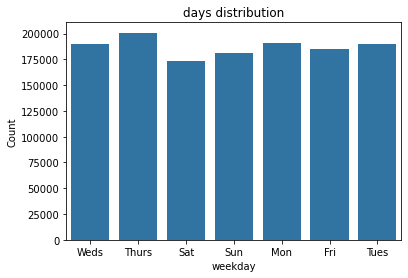

In [18]:
base_color = sb.color_palette()[0]
sb.countplot(data=df_copy, x='DayOfWeek', color=base_color)
plt.xlabel('weekday')
plt.ylabel('Count')
plt.title('days distribution');

In [19]:
df_copy['Month'].value_counts()


Oct    448620
Dec    440403
Nov    422803
Name: Month, dtype: int64

## A graph showing the distribution of flights on the month 
### It is clear to us that Oct was the month of most flights, and it reached 448620, a monthDec 440403 while a month comesNov 422803 It is the lowest month with flights

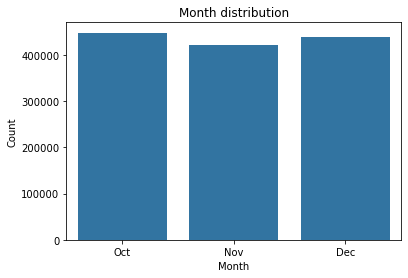

In [20]:
base_color = sb.color_palette()[0]
sb.countplot(data=df_copy, x='Month', color=base_color)
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Month distribution' , fontsize=12);

In [21]:
df_copy['Cancelled'].value_counts()


0    1292141
1      19685
Name: Cancelled, dtype: int64

In [22]:
not_Cancelled_df = df_copy[df_copy['Cancelled']=='0'
                             ].groupby(['Cancelled']).agg({'FlightNum' : 'count'}).rename(columns={'FlightNum':'count'}).reset_index()
Cancelled_df = df_copy[df_copy['Cancelled']=='1'
                             ].groupby(['Cancelled']).agg({'FlightNum' : 'count'}).rename(columns={'FlightNum':'count'}).reset_index()

In [23]:
not_Cancelled = df.query('Cancelled == "0"')['FlightNum'].count()
Cancelledd = df.query('Cancelled == "1"')['FlightNum'].count()

In [24]:
not_Cancelled_per= not_Cancelled/df_copy['FlightNum'].count()
Cancelled_per = Cancelledd/df_copy['FlightNum'].count()

In [25]:
not_Cancelled_per

0.9849941989257721

In [26]:
Cancelled_per

0.015005801074227831

## Percentage of flights canceled compared to completed flights
### It is clear to us that the canceled flights are very few, as the canceled flights reached 19685 out of 1292,141 representing 1%

<ipython-input-27-760aad382d59>:3: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  plt.pie(percent, labels=name, autopct='%0.f%%', shadow=True, startangle=45);


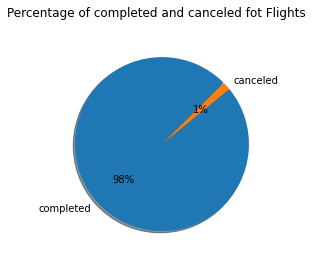

In [27]:
name = ['completed', 'canceled']
percent = [ 0.984 , 0.015]
plt.pie(percent, labels=name, autopct='%0.f%%', shadow=True, startangle=45);
plt.suptitle('Percentage of completed and canceled fot Flights', fontsize=12);

In [28]:
df_copy['Diverted'].value_counts()


0    1308011
1       3815
Name: Diverted, dtype: int64

In [29]:
not_Diverted_df = df_copy[df_copy['Diverted']=='0'
                             ].groupby(['Diverted']).agg({'FlightNum' : 'count'}).rename(columns={'FlightNum':'count'}).reset_index()
Diverted_df = df_copy[df_copy['Diverted']=='1'
                             ].groupby(['Diverted']).agg({'FlightNum' : 'count'}).rename(columns={'FlightNum':'count'}).reset_index()

In [30]:
not_Diverted = df.query('Diverted == "0"')['FlightNum'].count()
Divertedd = df.query('Diverted == "1"')['FlightNum'].count()

In [31]:
not_Diverted_per= not_Diverted/df_copy['FlightNum'].count()
Divertedd_per = Divertedd/df_copy['FlightNum'].count()

In [32]:
not_Diverted_per

0.9970918399238924

In [33]:
Divertedd_per

0.0029081600761076544

## The flights transferred to another destination are very few and may reach 3815 flights out of 1308011 flights, and this is a very small percentage, which is less than 0.029

<ipython-input-34-910b4757236e>:3: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  plt.pie(percent, labels=name, autopct='%0.1f%%', shadow=True, startangle=45);


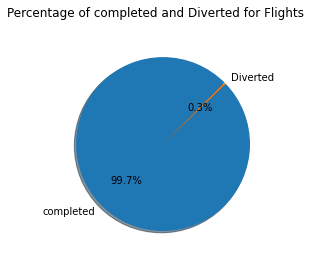

In [34]:
name = ['completed', 'Diverted']
percent = [ 0.9970 , 0.0029]
plt.pie(percent, labels=name, autopct='%0.1f%%', shadow=True, startangle=45);
plt.suptitle('Percentage of completed and Diverted for Flights ', fontsize=12);

In [35]:
df_copy['period_day'].value_counts()


morning      809221
afternoon    254464
night        248141
Name: period_day, dtype: int64

In [36]:
df_copy[df_copy['Month'] == 'Oct']['period_day'].value_counts()


morning      275088
afternoon     88146
night         85386
Name: period_day, dtype: int64

In [37]:
df_copy[df_copy['Month'] == 'Dec']['period_day'].value_counts()


morning      274669
afternoon     83841
night         81893
Name: period_day, dtype: int64

In [38]:
df_copy[df_copy['Month'] == 'Nov']['period_day'].value_counts()


morning      259464
afternoon     82477
night         80862
Name: period_day, dtype: int64

## A graph showing the number of flights for each time period in each month, in the month of October, the number of morning flights is 275088, the number of afternoon flights 88146 and the number of evening flights 85386, while in December the number of morning flights is 274669, the afternoon flights are 83841 and the number of evening flights is 81893, finally in the month of November. The number of morning flights is 259,464, the number of afternoon flights is 8,2477, and the number of evening flights is 80,862

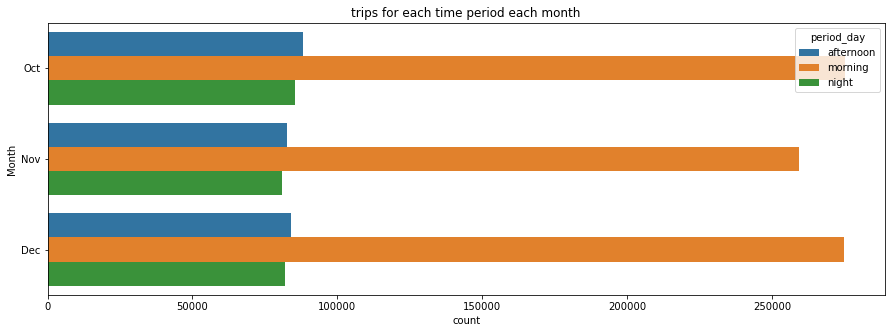

In [39]:
plt.figure(figsize=[15,5])
sb.countplot(data=df_copy, y='Month', hue='period_day')
plt.title('trips for each time period each month' , fontsize=12);

## Average Actual Elapsed Time in minutes Per time period 
### The average actual elapsed time for morning trips is 300 minutes and may reach a maximum of 420 minutes, and the average time for noon period 280 minutes, and it may reach a maximum of about 390 minutes, and finally the average time for the night time period is 290 and it may reach a maximum of 450 minutes

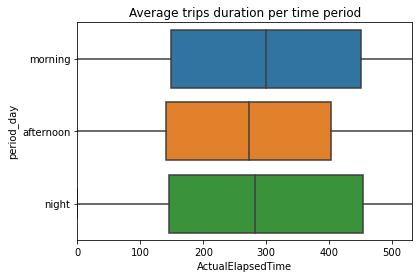

In [40]:
period_day_count = df_copy.groupby(["ActualElapsedTime", "period_day"]).size().reset_index()

sb.boxplot(x='ActualElapsedTime',y='period_day',data=period_day_count)
plt.xlim(0,period_day_count['ActualElapsedTime'].quantile(0.90));
plt.title('Average trips duration per time period',  fontsize=12);

plt.show()

In [41]:
df_copy['DepDelay'].describe()

count    1.292141e+06
mean     8.063638e+00
std      2.402479e+01
min     -1.345000e+03
25%      0.000000e+00
50%      0.000000e+00
75%      8.000000e+00
max      1.439000e+03
Name: DepDelay, dtype: float64

### Most of the delays in air flight are in the moreing, and at the same time they are the earliest periods, although most flights are night or afternoon, but  The minimum delay  and early period is afternoon 

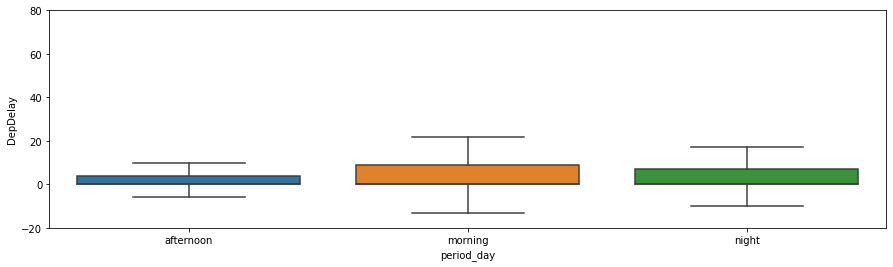

In [42]:
plt.figure(figsize=[15,4])

step = 10
min_val=-20
max_val=80
ax= sb.boxplot(x='period_day', y='DepDelay'  , data=df_copy , showfliers=False)

ax.set_ylim([min_val, max_val]) ;


In [43]:
print(len(df_copy['Dest'].value_counts()))
df_copy['Dest'].value_counts()[0:10]

237


ORD    67830
ATL    66783
DFW    52450
LAX    45597
DEN    44284
SFO    34948
STL    32690
EWR    31058
PHX    30234
PIT    29296
Name: Dest, dtype: int64

In [44]:
locs = ['ORD','ATL','DFW','LAX','DEN','SFO','STL','EWR','PHX','PIT'] 
df_top10 = df_copy.loc[df_copy['Dest'].isin(locs)]
df_top10['Dest'].value_counts()


ORD    67830
ATL    66783
DFW    52450
LAX    45597
DEN    44284
SFO    34948
STL    32690
EWR    31058
PHX    30234
PIT    29296
Name: Dest, dtype: int64

In [45]:
df_top10.head()

,Year,Month,DayOfWeek,DepTime,ArrTime,FlightNum,ActualElapsedTime,ArrDelay,DepDelay,Origin,Dest,Distance,Cancelled,Diverted,Actual_Departure_Time,Actual_Arrival_Time,period_day
0,1987,Oct,Weds,741.0,912.0,1451,91.0,23.0,11.0,SAN,SFO,447.0,0,0,12.350000,15.200000,afternoon
1,1987,Oct,Thurs,729.0,903.0,1451,94.0,14.0,-1.0,SAN,SFO,447.0,0,0,12.150000,15.050000,afternoon
2,1987,Oct,Sat,741.0,918.0,1451,97.0,29.0,11.0,SAN,SFO,447.0,0,0,12.350000,15.300000,afternoon
3,1987,Oct,Sun,729.0,847.0,1451,78.0,-2.0,-1.0,SAN,SFO,447.0,0,0,12.150000,14.116667,afternoon
4,1987,Oct,Mon,749.0,922.0,1451,93.0,33.0,19.0,SAN,SFO,447.0,0,0,12.483333,15.366667,afternoon


## The top 10 cities people prefer and the number of flights for each month
### Come first at ORD destination airportThe number of flights reached 67830, ATL and the number of flights reached 66783, which is a very slight difference from the first rank, DFW and the number of flights reached 52450 LAX and the number of flights reached 45597, SFO the number of flights reached 34948, STL and the number of flights reached 32690, EWR and the number of flights reached 31058, PHX, the number of flights reached 30,234, and finally PIT came in tenth place, and the number of flights reached 29,296


C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


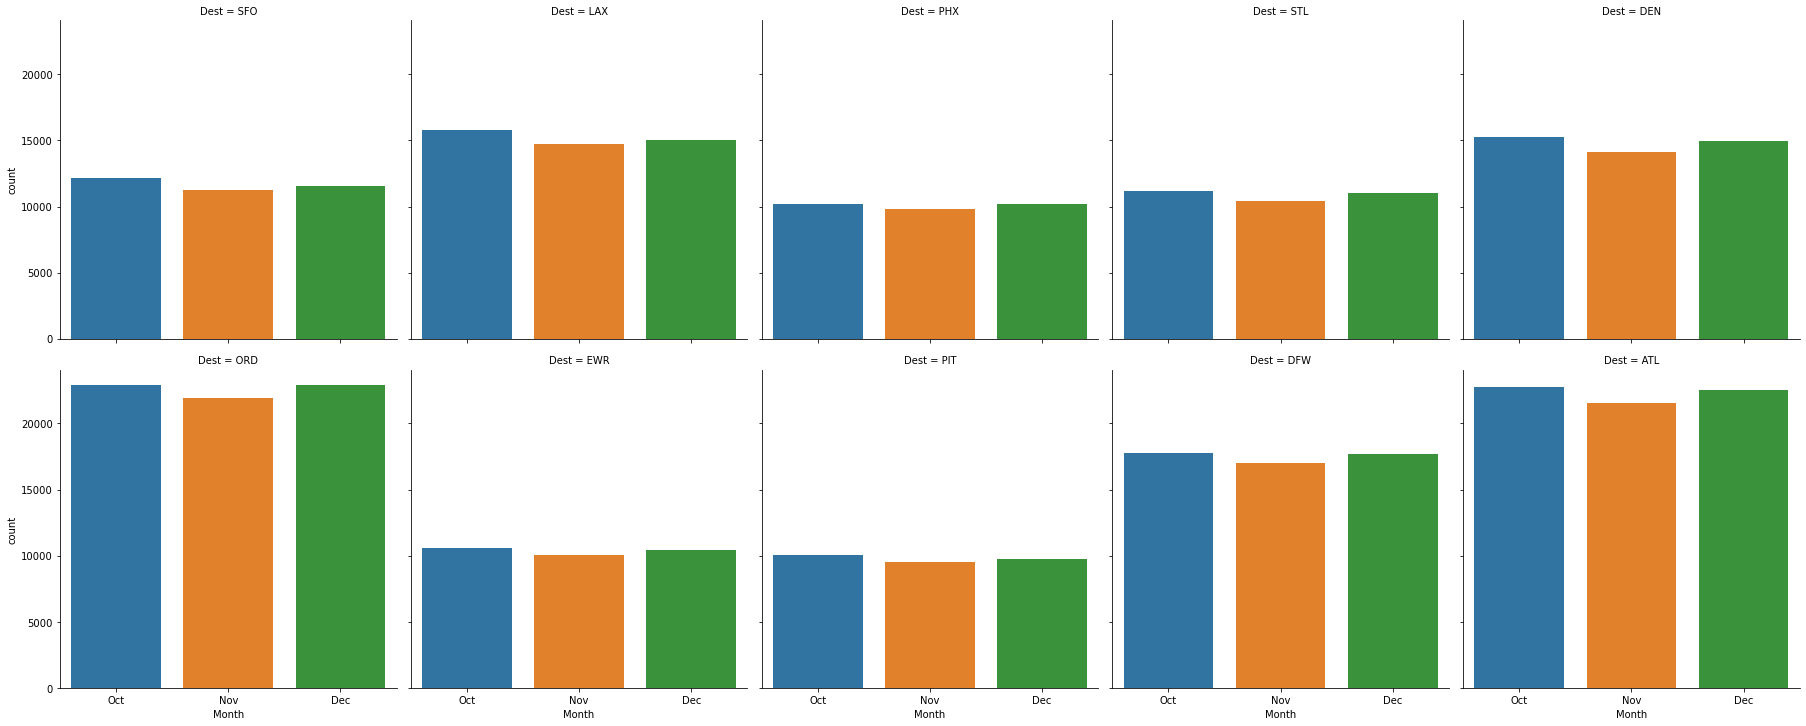

In [46]:
sb.factorplot("Month", col = "Dest", col_wrap = 5,data=df_top10 ,kind = "count")
plt.show()

## Average, highest and lowest air flights per time period per month
### The month of December comes as the highest Actual Elapsed Time, and it may reach approximately two and a half hours, the average is an hour and 40 minutes, while the lowest time may reach an hour and 10 minutes. The lowest time may reach an hour and 10 minutes, and finally the month of October comes as the highest time for Actual Elapsed Time and it may reach approximately two hours and 10 minutes, the average is an hour and a half minutes, while the lowest time may reach an hour and 10 minutes


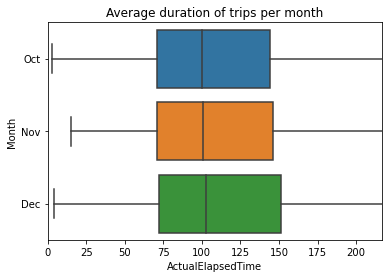

In [47]:
   sb.boxplot(x='ActualElapsedTime',y='Month',data=df_top10)
plt.xlim(0,df_top10['ActualElapsedTime'].quantile(0.90));
plt.title('Average duration of trips per month',  fontsize=12);

plt.show()

In [48]:
DepDelay_df = df_copy[(df_copy['DepDelay']<0)
                             ].groupby(['Origin', 'DepDelay' ]).agg({'FlightNum' : 'count'}).rename(columns={'FlightNum':'count'}).reset_index()
ArrDelay_df = df_copy[(df_copy['DepDelay']<0)
                             ].groupby(['Dest', 'ArrDelay' ]).agg({'FlightNum' : 'count'}).rename(columns={'FlightNum':'count'}).reset_index()

In [49]:
DepDelay_df

,Origin,DepDelay,count
0,ABE,-16.0,1
1,ABE,-12.0,1
2,ABE,-11.0,4
3,ABE,-10.0,4
4,ABE,-9.0,3
...,...,...,...
2306,YKM,-3.0,6
2307,YKM,-2.0,40
2308,YKM,-1.0,31
2309,YUM,-5.0,1


In [50]:
DepDelay_df['Origin'].value_counts() # Most of the airports that cancel their flights 

DCA    35
MLI    32
FLL    30
LGA    29
BWI    27
       ..
GCN     2
YUM     2
PUB     1
DAL     1
BTM     1
Name: Origin, Length: 232, dtype: int64

In [51]:
Most_Origin_airports_Delay=DepDelay_df['Origin'].value_counts()[0:10]

In [52]:
Most_Origin_airports_Delay

DCA    35
MLI    32
FLL    30
LGA    29
BWI    27
GSP    26
JFK    26
IAD    26
OGG    25
ATW    24
Name: Origin, dtype: int64

In [53]:
locs = ['DCA','MLI','FLL','LGA','BWI','GSP','IAD','JFK','OGG','ATW'] 
Most_Origin_airports_Delay = DepDelay_df.loc[DepDelay_df['Origin'].isin(locs)]
Most_Origin_airports_Delay['Origin'].value_counts()

DCA    35
MLI    32
FLL    30
LGA    29
BWI    27
JFK    26
GSP    26
IAD    26
OGG    25
ATW    24
Name: Origin, dtype: int64

## Most of the  Origin airports that Delay their flights 
### DCA comesAs the most airport in which flights are delayed, flights are late, 35, DCA delayed flights 35, MLI late 32, FLL late 30, LGA late 29, BWI 27 late flights, then JFK, GSP, IAD with the same number of flights Late 26, OGG Late Flights 25, and finally 10th ATW Late Flights

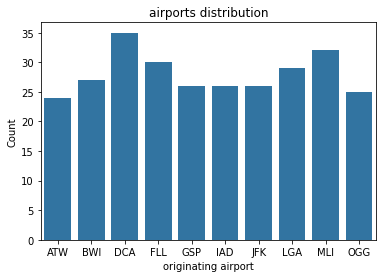

In [54]:
base_color = sb.color_palette()[0]
sb.countplot(data=Most_Origin_airports_Delay, x='Origin', color=base_color)
plt.xlabel('originating airport')
plt.ylabel('Count')
plt.title('airports distribution' , fontsize=12);

In [55]:
ArrDelay_df

,Dest,ArrDelay,count
0,ABE,-20.0,1
1,ABE,-16.0,2
2,ABE,-15.0,3
3,ABE,-14.0,5
4,ABE,-13.0,2
...,...,...,...
9111,YKM,7.0,1
9112,YKM,8.0,1
9113,YKM,9.0,1
9114,YKM,12.0,1


In [56]:
Most_Dest_airports_Delay=ArrDelay_df['Dest'].value_counts()[0:10]

In [57]:
Most_Dest_airports_Delay

DEN    120
SFO    116
LAX    113
ORD    108
LGA    101
IAH     97
EWR     96
DFW     95
STL     95
JFK     95
Name: Dest, dtype: int64

In [58]:
locs = ['DEN','SFO','LAX','ORD','LGA','IAH','EWR','DFW','STL','JFK'] 
Most_Dest_airports_Delay = ArrDelay_df.loc[ArrDelay_df['Dest'].isin(locs)]
Most_Dest_airports_Delay['Dest'].value_counts()

DEN    120
SFO    116
LAX    113
ORD    108
LGA    101
IAH     97
EWR     96
DFW     95
JFK     95
STL     95
Name: Dest, dtype: int64

## Most of the  destination airport  that Delay their flights 
### DEN comes As the most airport in which flights are delayed, delayed flights reached 120, SFO delayed flights were 116, LAX delayed flights 113, ORD delayed flights 108, LGA delayed flights 101, IAH delayed flights 97, EWR delayed flights 96 JFK and then came the last three airports DFW JFK, STL equal number of delayed flights 95

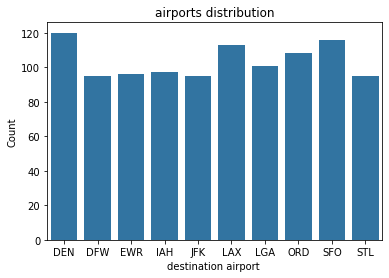

In [59]:
base_color = sb.color_palette()[0]
sb.countplot(data=Most_Dest_airports_Delay, x='Dest', color=base_color)
plt.xlabel('destination airport ')
plt.ylabel('Count')
plt.title('airports distribution' , fontsize=12);

In [60]:
# Just set a condition in the morning So we eant strt from 6 AM ()
morning_df = df_copy[(df_copy['period_day']=='morning')
                             ].groupby(['DayOfWeek', 'Month' ,'period_day']).agg({'FlightNum' : 'count'}).rename(columns={'FlightNum':'count'}).reset_index()
afternoon_df = df_copy[(df_copy['period_day']=='afternoon')
                             ].groupby(['DayOfWeek', 'Month' ,'period_day']).agg({'FlightNum' : 'count'}).rename(columns={'FlightNum':'count'}).reset_index()
night_df = df_copy[(df_copy['period_day']=='night')
                             ].groupby(['DayOfWeek', 'Month' ,'period_day']).agg({'FlightNum' : 'count'}).rename(columns={'FlightNum':'count'}).reset_index()

### The number of flights for each day in every month in each time period was the highest number of flights in the morning period on Thursday in the month of December and the number of flights reached 44,947 while the number of flights was on Monday, and from December the number of flights was 31175. The afternoon flight on Tuesday in October was the most on the day of the number of flights, and the number of flights reached 14587, while the lowest number was on Monday from December, and the number of flights reached 9976, and finally the evening period on Tuesday in October was the most day of flights, and it reached 13,885. While the number of flights was on Saturday, the lowest was 10456


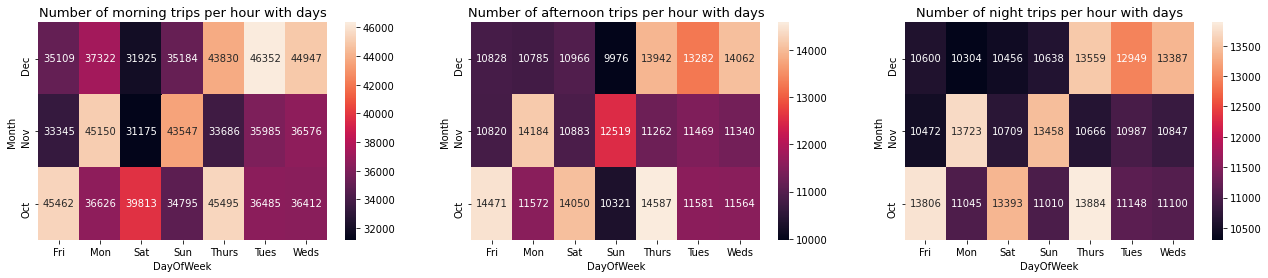

In [61]:
f = plt.figure(figsize=(22,4))

ax = f.add_subplot(1,3,1) 

heat_map_morning=morning_df.pivot('Month','DayOfWeek','count')
dis=sb.heatmap(heat_map_morning,annot=True , fmt='d' )
plt.title('Number of morning trips per hour with days' , fontsize= 13)
ax2 = f.add_subplot(1,3,2) 
heat_map_afternoon=afternoon_df.pivot('Month','DayOfWeek','count')
dis=sb.heatmap(heat_map_afternoon,annot=True , fmt='d' )
plt.title('Number of afternoon trips per hour with days' ,fontsize=13)

ax3 = f.add_subplot(1,3,3) 
heat_map_night=night_df.pivot('Month','DayOfWeek','count' )
dis=sb.heatmap(heat_map_night,annot=True , fmt='d' )
plt.title('Number of night trips per hour with days' ,  fontsize=13);

In [88]:

Cancelled = df_copy[(df_copy['Cancelled']>0)
                             ].groupby(['Dest' ,'Month']).agg({'FlightNum' : 'count'}).rename(columns={'FlightNum':'count'}).reset_index()

In [89]:
Cancelled

,Dest,Month,count
0,ABE,Dec,12
1,ABE,Nov,2
2,ABE,Oct,1
3,ABQ,Dec,69
4,ABQ,Nov,24
...,...,...,...
615,YKM,Dec,2
616,YKM,Nov,1
617,YUM,Dec,2
618,YUM,Nov,3


In [109]:
Cancelled.value_counts()[0:1]

Dest  Month  count
YUM   Oct    8        1
dtype: int64

In [147]:
CancelledD=Cancelled.groupby(['count', 'Dest'])['Month'].value_counts().tail(10)
CancelledD

count  Dest  Month
257    DCA   Nov      1
289    DTW   Dec      1
337    ATL   Nov      1
393    DEN   Nov      1
430    SFO   Dec      1
460    LAX   Dec      1
471    ATL   Dec      1
526    STL   Dec      1
929    DEN   Dec      1
1446   ORD   Dec      1
Name: Month, dtype: int64

In [154]:
CancelledD

count  Dest  Month
257    DCA   Nov      1
289    DTW   Dec      1
337    ATL   Nov      1
393    DEN   Nov      1
430    SFO   Dec      1
460    LAX   Dec      1
471    ATL   Dec      1
526    STL   Dec      1
929    DEN   Dec      1
1446   ORD   Dec      1
Name: Month, dtype: int64

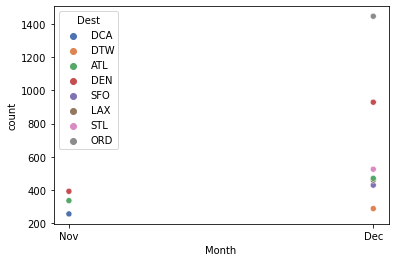

In [164]:

ax = sb.scatterplot(x='Month', y='count', hue="Dest", data=CancelledD,
                      sizes=(200, 1000), alpha=1, palette="deep")

# 

In [80]:
Cancelled_df = df_copy[(df_copy['Cancelled']>0) &(df_copy['Month']=='Dec')
                             ].groupby(['Dest', 'Month']).agg({'FlightNum' : 'count'}).rename(columns={'FlightNum':'count'}).reset_index()


In [153]:
Cancelled_df.value_counts()[0:10]

Dest  Month  count
YUM   Dec    2        1
EYW   Dec    2        1
GEG   Dec    19       1
GCN   Dec    1        1
FWA   Dec    14       1
FSD   Dec    28       1
FNT   Dec    1        1
FLL   Dec    42       1
FLG   Dec    7        1
FAY   Dec    4        1
dtype: int64

In [95]:
CancelledD=Cancelled_df.groupby(['Month', 'Dest'])['count'].value_counts()[0:10]
CancelledD


Month  Dest  count
Dec    ABE   12       1
       ABQ   69       1
       ACV   2        1
       AGS   12       1
       ALB   22       1
       ALO   11       1
       AMA   41       1
       ANC   13       1
       APF   1        1
       ATL   471      1
Name: count, dtype: int64